# EDA

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns

In [34]:
df = pd.read_csv('Train.csv')
df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,...,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,...,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,...,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,...,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Platform Type,21201.0,2.752182,0.625178,1.000000,3.000000,3.000000,3.000000,4.000000
Placement - Day of Month,21201.0,15.653696,8.798916,1.000000,8.000000,15.000000,23.000000,31.000000
Placement - Weekday (Mo = 1),21201.0,3.240083,1.567295,1.000000,2.000000,3.000000,5.000000,7.000000
Confirmation - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Confirmation - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Arrival at Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Destination - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000


In [36]:
the_df = df.apply(lambda x: round(x/60,2) if x.name == 'Time from Pickup to Arrival' else x)

In [37]:
the_df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,12.42
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,33.22
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,7.58
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,22.35
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,20.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,...,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,0.15
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,...,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,12.83
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,...,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,49.22
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,...,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,23.00


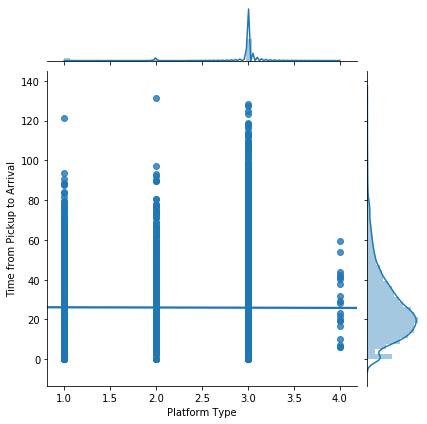

In [38]:
sns.jointplot(x='Platform Type', y='Time from Pickup to Arrival', data=the_df, kind="reg")

#PVT = plt.scatter(df['Platform Type'],df['Time from Pickup to Arrival'], c='white',alpha=0.2)
#ax = plt.gca()
#ax.set_facecolor('darkgrey')
#plt.show()

In [39]:
df['Platform Type'].corr(df['Time from Pickup to Arrival'])*100

-0.3827292249693595

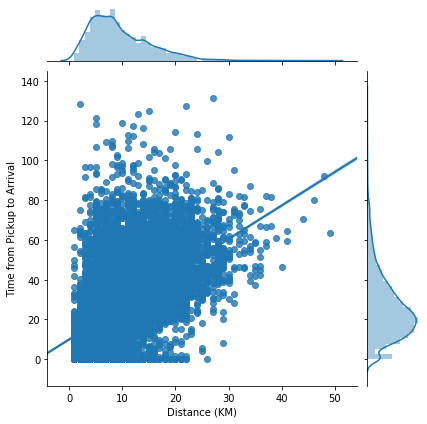

In [40]:
sns.jointplot(x='Distance (KM)', y='Time from Pickup to Arrival', data=the_df, kind="reg")

In [41]:
the_df['Distance (KM)'].corr(the_df['Time from Pickup to Arrival'])*100

58.06082582222722

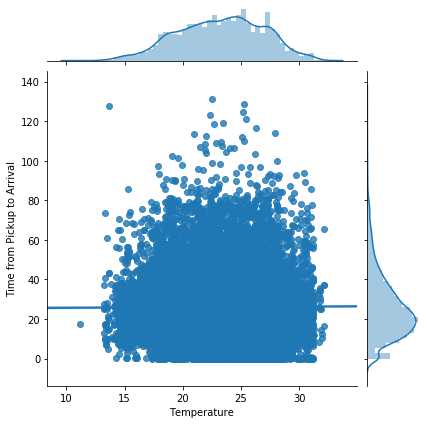

In [42]:
sns.jointplot(x='Temperature', y='Time from Pickup to Arrival', data=the_df, kind="reg")

In [43]:
the_df['Temperature'].corr(the_df['Time from Pickup to Arrival'])*100

0.646374291224711

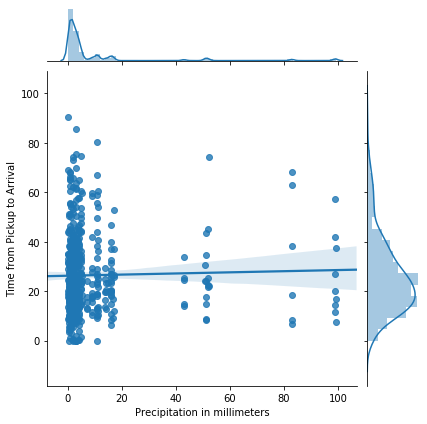

In [44]:
sns.jointplot(x='Precipitation in millimeters', y='Time from Pickup to Arrival', data=the_df, kind="reg")

In [45]:
the_df['Time from Pickup to Arrival'].corr(the_df['Precipitation in millimeters'])*100

2.475108490338376

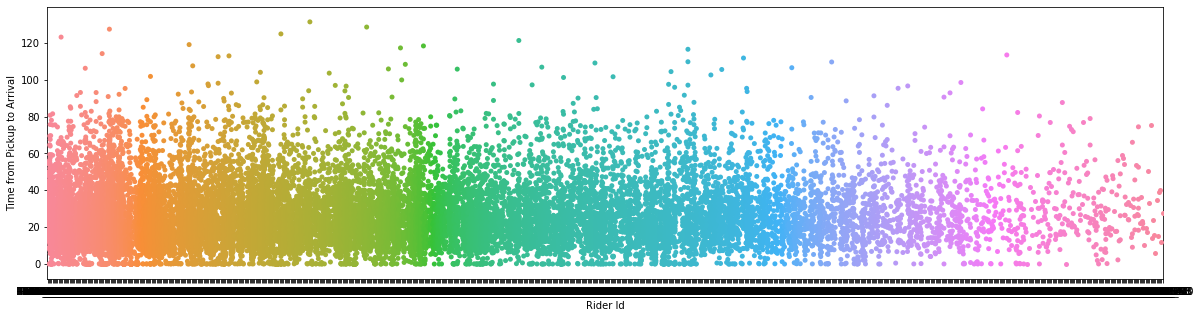

In [46]:
plt.figure(figsize=(20,5))
sns.swarmplot(x='Rider Id', y='Time from Pickup to Arrival', data=the_df,)

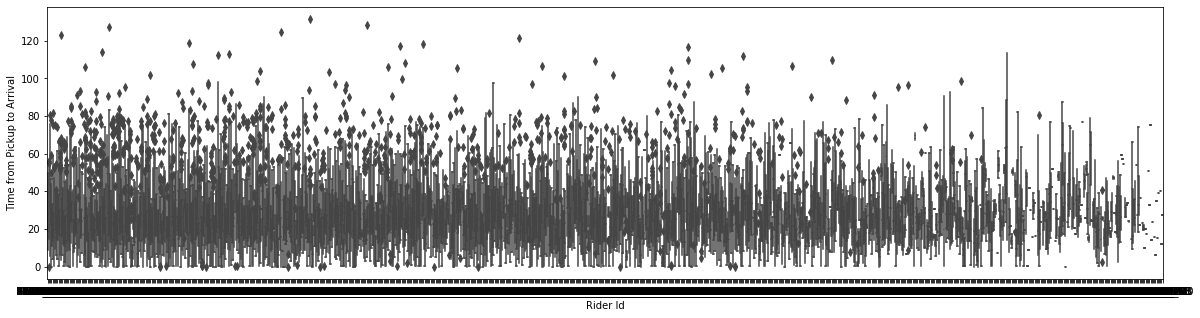

In [47]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Rider Id', y='Time from Pickup to Arrival', data=the_df)

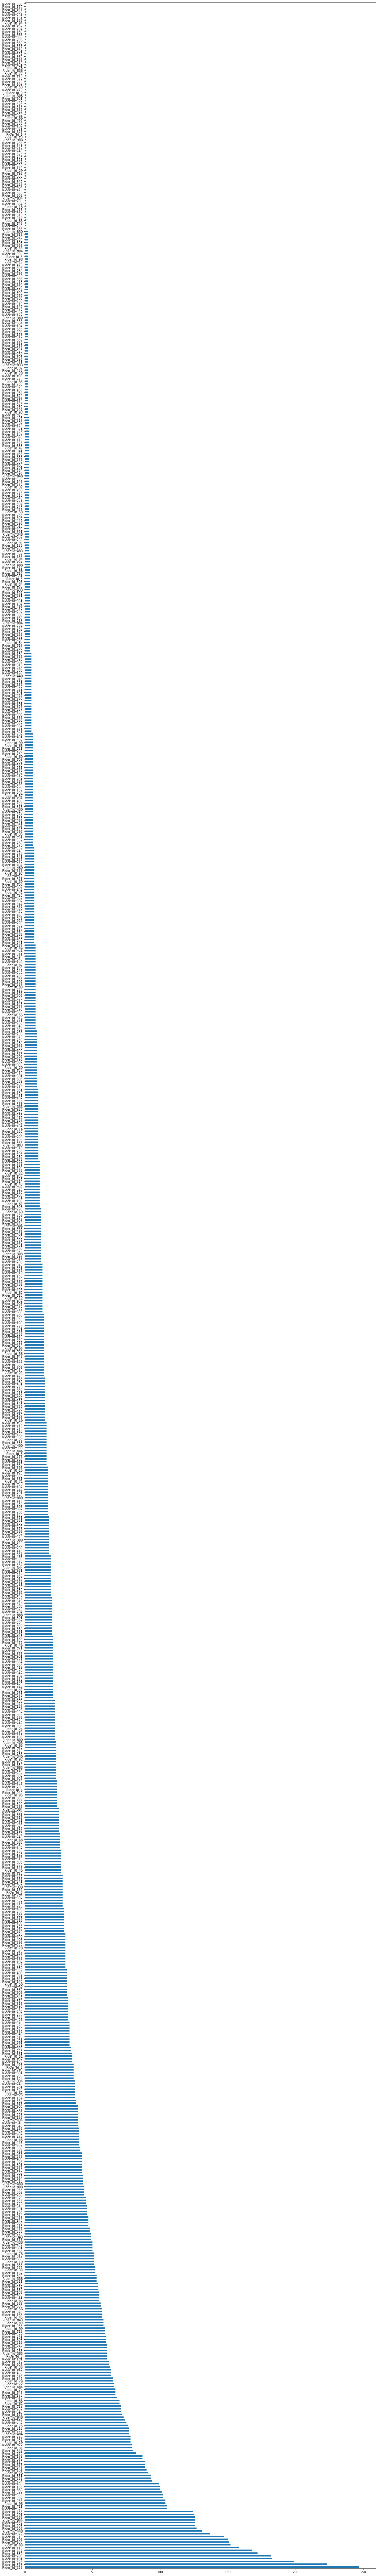

In [48]:
the_df['Rider Id'].value_counts().plot(kind = 'barh',figsize = (20,150))

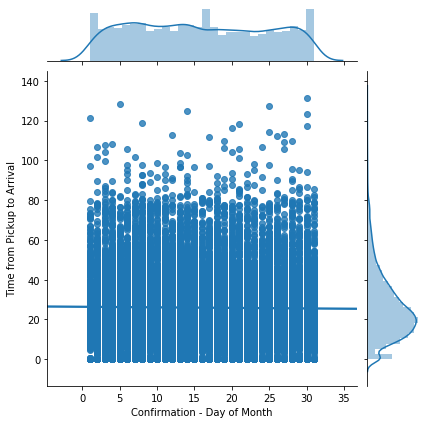

In [49]:
sns.jointplot(x='Confirmation - Day of Month', y='Time from Pickup to Arrival', data=the_df, kind="reg")

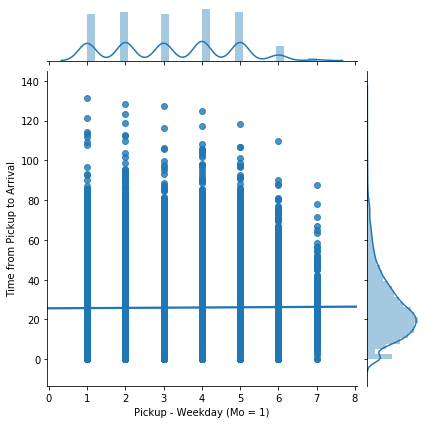

In [50]:
sns.jointplot(x='Pickup - Weekday (Mo = 1)', y='Time from Pickup to Arrival', data=the_df, kind="reg")

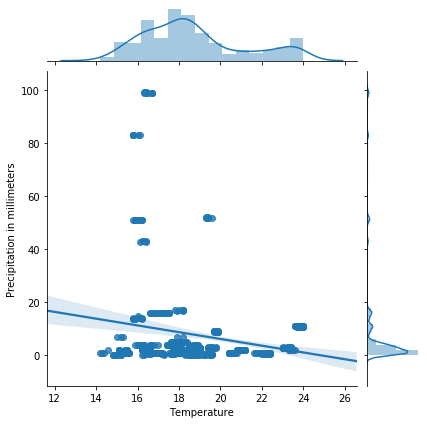

In [51]:
sns.jointplot(x='Temperature', y='Precipitation in millimeters', data=the_df, kind="reg")

In [52]:
the_df['Temperature'].corr(the_df['Precipitation in millimeters'])*100

-18.132705697319285

In [53]:
Prec = {'Precipitation in millimeters':0,'Temperature':the_df['Temperature'].mean()}
Prec_the_df= the_df.fillna(value=Prec) 

In [54]:
Prec_the_df['Precipitation in millimeters']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21196    0.0
21197    0.0
21198    0.0
21199    0.0
21200    0.0
Name: Precipitation in millimeters, Length: 21201, dtype: float64

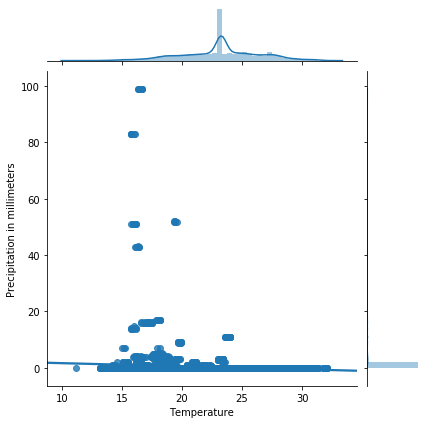

In [55]:
sns.jointplot(x='Temperature', y='Precipitation in millimeters', data=Prec_the_df, kind="reg")

In [56]:
Prec_the_df['Temperature'].corr(Prec_the_df['Precipitation in millimeters'])*100

-11.650300590899583

In [57]:
z = the_df['Temperature'].mode()
z[0]
Temp = {'Temperature':z[0]}
Temp_the_df= the_df.fillna(value=Temp) 

In [58]:
Temp_the_df['Temperature']

0        20.4
1        26.4
2        24.7
3        19.2
4        15.4
         ... 
21196    28.6
21197    26.0
21198    29.2
21199    15.0
21200    30.9
Name: Temperature, Length: 21201, dtype: float64

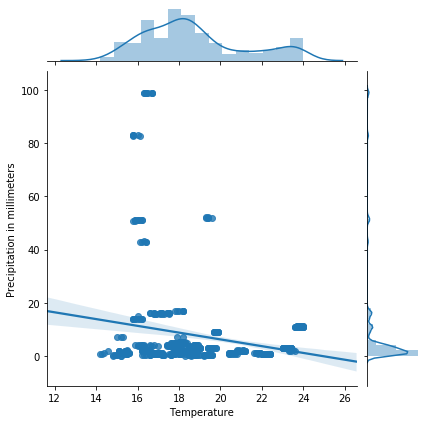

In [59]:
sns.jointplot(x='Temperature', y='Precipitation in millimeters', data=Temp_the_df, kind="reg")

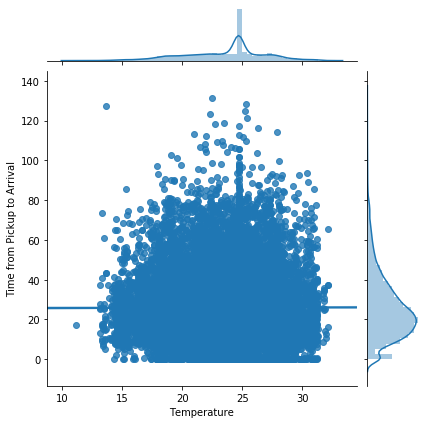

In [60]:
sns.jointplot(x='Temperature', y='Time from Pickup to Arrival', data=Temp_the_df, kind="reg")

In [61]:
z = the_df['Temperature'].mode()
z[0]

24.7

In [62]:
the_df.fillna(method= 'ffill')

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,12.42
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,33.22
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,26.4,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,7.58
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,22.35
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,20.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,...,4:20:17 PM,3,28.6,0.9,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,0.15
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,...,10:46:17 AM,7,26.0,0.9,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,12.83
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,...,6:40:05 PM,20,29.2,0.9,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,49.22
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,...,10:08:15 AM,13,15.0,0.9,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,23.00


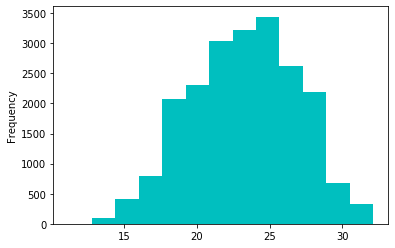

In [63]:
the_df['Temperature'].fillna(method='ffill',inplace=True)
the_df['Temperature'].plot(kind='hist', color='c', bins=13)

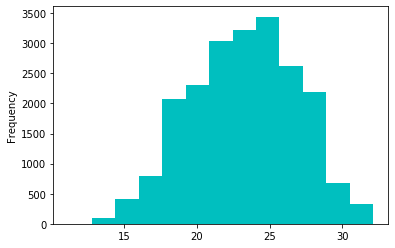

In [64]:
the_df['Temperature'].plot(kind='hist', color='c', bins=13)

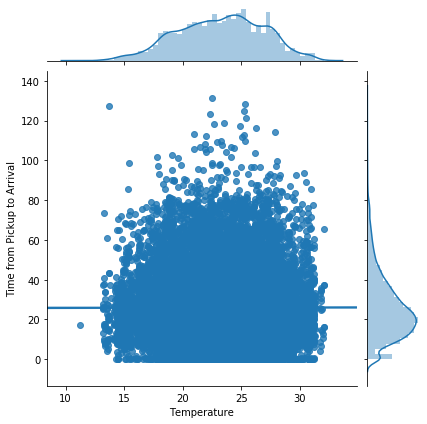

In [65]:
sns.jointplot(x='Temperature', y='Time from Pickup to Arrival', data=the_df, kind="reg")

In [66]:
the_df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,12.42
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,33.22
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,26.4,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,7.58
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,22.35
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,20.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,...,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,0.15
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,...,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,12.83
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,...,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,49.22
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,...,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,23.00


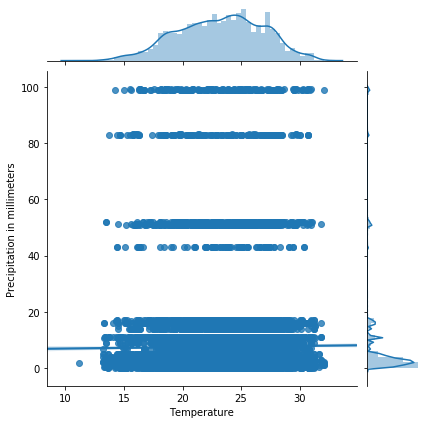

In [67]:
precip = the_df.fillna(method = 'ffill')
precip
sns.jointplot(x='Temperature', y='Precipitation in millimeters', data=precip, kind="reg")

In [68]:
df_copy = df.copy()

In [69]:
df_copy.dropna(subset=['Precipitation in millimeters'],inplace=True)

In [70]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Platform Type,552.0,2.724638,0.640645,1.000000,3.000000,3.000000,3.000000,4.000000
Placement - Day of Month,552.0,13.990942,9.311211,1.000000,5.000000,11.000000,22.000000,31.000000
Placement - Weekday (Mo = 1),552.0,2.817029,1.380786,1.000000,2.000000,3.000000,4.000000,7.000000
Confirmation - Day of Month,552.0,13.990942,9.311211,1.000000,5.000000,11.000000,22.000000,31.000000
Confirmation - Weekday (Mo = 1),552.0,2.817029,1.380786,1.000000,2.000000,3.000000,4.000000,7.000000
Arrival at Pickup - Day of Month,552.0,13.990942,9.311211,1.000000,5.000000,11.000000,22.000000,31.000000
Arrival at Pickup - Weekday (Mo = 1),552.0,2.817029,1.380786,1.000000,2.000000,3.000000,4.000000,7.000000
Pickup - Day of Month,552.0,13.990942,9.311211,1.000000,5.000000,11.000000,22.000000,31.000000
Pickup - Weekday (Mo = 1),552.0,2.817029,1.380786,1.000000,2.000000,3.000000,4.000000,7.000000
Arrival at Destination - Day of Month,552.0,13.990942,9.311211,1.000000,5.000000,11.000000,22.000000,31.000000


<Figure size 1440x1080 with 0 Axes>

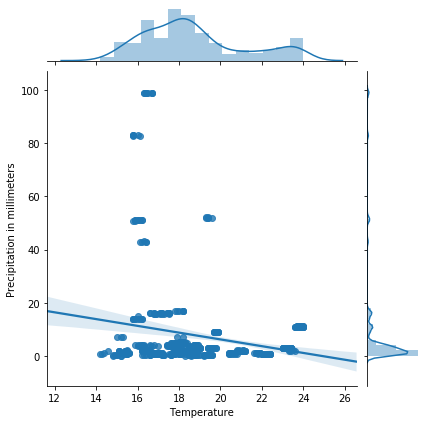

In [71]:
plt.figure(figsize=(20,15))
sns.jointplot(x='Temperature', y='Precipitation in millimeters', data=df_copy, kind="reg")

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Platform Type,21201.0,2.752182,0.625178,1.000000,3.000000,3.000000,3.000000,4.000000
Placement - Day of Month,21201.0,15.653696,8.798916,1.000000,8.000000,15.000000,23.000000,31.000000
Placement - Weekday (Mo = 1),21201.0,3.240083,1.567295,1.000000,2.000000,3.000000,5.000000,7.000000
Confirmation - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Confirmation - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Arrival at Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Destination - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000


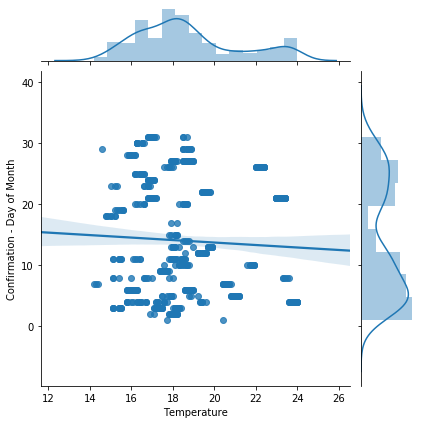

In [75]:
sns.jointplot(x='Temperature', y='Confirmation - Day of Month', data=df_copy, kind="reg")

In [76]:
Prec_the_df['Temperature'].corr(Prec_the_df['Confirmation - Day of Month'])*100

1.1606242788854666

In [130]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 

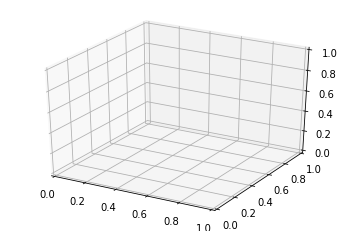

In [79]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [80]:
from mpl_toolkits.mplot3d import Axes3D 


In [81]:
the_df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,12.42
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,33.22
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,26.4,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,7.58
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,22.35
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,20.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,...,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,0.15
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,...,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,12.83
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,...,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,49.22
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,...,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,23.00


In [82]:
z = the_df.groupby('Placement - Day of Month').count()
z

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
Placement - Day of Month,,,,,,,,,,,,,,,,,,,,,
1,482,482,482,482,482,482,482,482,482,482,...,482,482,482,2,482,482,482,482,482,482
2,602,602,602,602,602,602,602,602,602,602,...,602,602,602,14,602,602,602,602,602,602
3,718,718,718,718,718,718,718,718,718,718,...,718,718,718,38,718,718,718,718,718,718
4,769,769,769,769,769,769,769,769,769,769,...,769,769,769,59,769,769,769,769,769,769
5,747,747,747,747,747,747,747,747,747,747,...,747,747,747,32,747,747,747,747,747,747
6,794,794,794,794,794,794,794,794,794,794,...,794,794,794,38,794,794,794,794,794,794
7,822,822,822,822,822,822,822,822,822,822,...,822,822,822,15,822,822,822,822,822,822
8,848,848,848,848,848,848,848,848,848,848,...,848,848,848,16,848,848,848,848,848,848
9,667,667,667,667,667,667,667,667,667,667,...,667,667,667,21,667,667,667,667,667,667


In [83]:
the_df['Placement - Day of Month'].unique()

array([ 9, 12, 30, 15, 13, 14, 11, 23,  2, 25, 19, 28, 22, 10,  3,  5, 17,
        8,  7, 31, 24, 27, 16, 26, 18, 21,  1,  4,  6, 29, 20],
      dtype=int64)

In [84]:
the_df[['Placement - Day of Month','Placement - Weekday (Mo = 1)']].head(50)

,Placement - Day of Month,Placement - Weekday (Mo = 1)
0,9,5
1,12,5
2,30,2
3,15,5
4,13,1
5,14,5
6,9,5
7,11,1
8,30,2
9,23,5


In [103]:
s=the_df.apply(lambda x: (x/(df['Time from Pickup to Arrival'])) if x.name=='Distance (KM)' else x )

In [104]:
s

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,0.005369,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,12.42
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,0.008028,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,33.22
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,0.006593,26.4,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,7.58
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,0.006711,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,22.35
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,0.007414,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,20.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,...,4:20:17 PM,0.333333,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,0.15
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,...,10:46:17 AM,0.009091,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,12.83
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,...,6:40:05 PM,0.006773,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,49.22
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,...,10:08:15 AM,0.009420,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,23.00


In [102]:
the_df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,12.42
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,33.22
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,26.4,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,7.58
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,22.35
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,20.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,...,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,0.15
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,...,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,12.83
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,...,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,49.22
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,...,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,23.00


In [108]:
time_h = np.array((df['Time from Pickup to Arrival']/60)/60)
time_h

array([0.20694444, 0.55361111, 0.12638889, ..., 0.82027778, 0.38333333,
       0.59111111])

In [110]:
disty = df['Distance (KM)'].values
disty

array([ 4, 16,  3, ..., 20, 13, 12], dtype=int64)

In [112]:
dict_s = {'Time(h)':time_h,'Distance (KM)':disty}
dict_s

{'Time(h)': array([0.20694444, 0.55361111, 0.12638889, ..., 0.82027778, 0.38333333,
        0.59111111]),
 'Distance (KM)': array([ 4, 16,  3, ..., 20, 13, 12], dtype=int64)}

In [114]:
df_s = pd.DataFrame(dict_s,columns=['Time(h)','Distance (KM)'])
df_s

,Time(h),Distance (KM)
0,0.206944,4
1,0.553611,16
2,0.126389,3
3,0.372500,9
4,0.337222,9
...,...,...
21196,0.002500,3
21197,0.213889,7
21198,0.820278,20
21199,0.383333,13


In [119]:
Speed = round(df_s['Distance (KM)']/df_s['Time(h)'],2).values

In [122]:
df_s['Speed (KM/h)'] = Speed

In [125]:
df_s.drop(columns='Speed',inplace=True)
df_s

,Time(h),Distance (KM),Speed (KM/h)
0,0.206944,4,19.33
1,0.553611,16,28.90
2,0.126389,3,23.74
3,0.372500,9,24.16
4,0.337222,9,26.69
...,...,...,...
21196,0.002500,3,1200.00
21197,0.213889,7,32.73
21198,0.820278,20,24.38
21199,0.383333,13,33.91


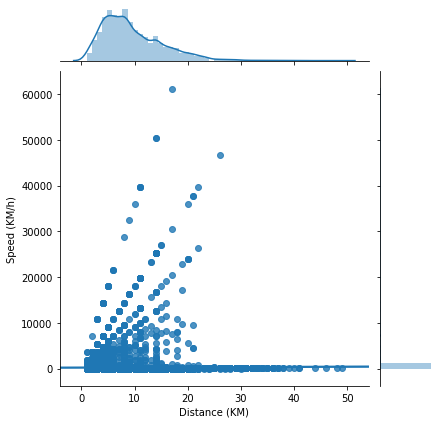

In [127]:
sns.jointplot(x='Distance (KM)', y='Speed (KM/h)', data=df_s, kind="reg")

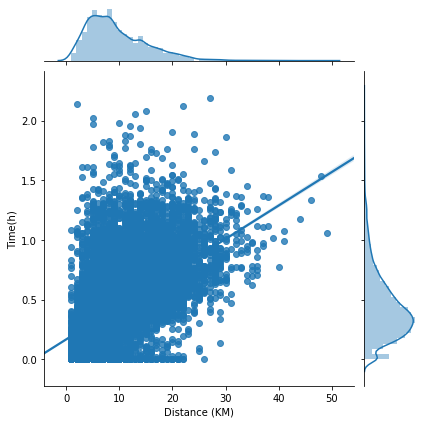

In [128]:
sns.jointplot(x='Distance (KM)', y='Time(h)', data=df_s, kind="reg")

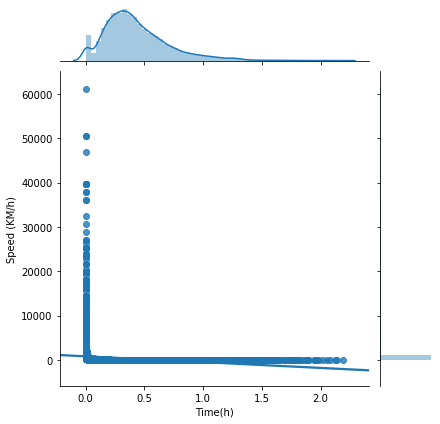

In [129]:
sns.jointplot(x='Time(h)', y='Speed (KM/h)', data=df_s, kind="reg")

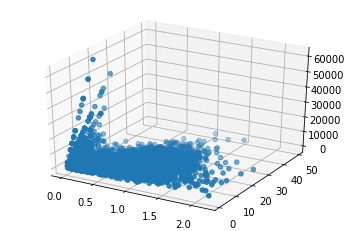

In [134]:
fig = plt.figure()
ax = plt.axes(projection='3d')

zdata = df_s['Speed (KM/h)']
xdata = df_s['Time(h)']
ydata = df_s['Distance (KM)']
ax.scatter3D(xdata, ydata, zdata, cmap='Greens');

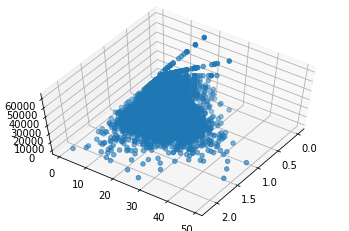

In [135]:
ax.view_init(60, 35)
fig

In [137]:
df['Speed'] = Speed

In [138]:
df


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Speed
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,19.33
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,28.90
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,23.74
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,24.16
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,26.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,...,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9,1200.00
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,...,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770,32.73
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,...,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953,24.38
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,...,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380,33.91


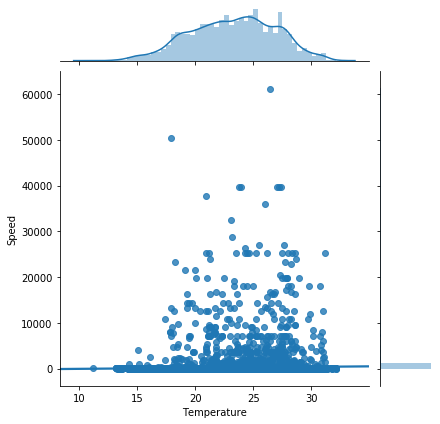

In [141]:
sns.jointplot(x='Temperature', y='Speed', data=df, kind="reg")

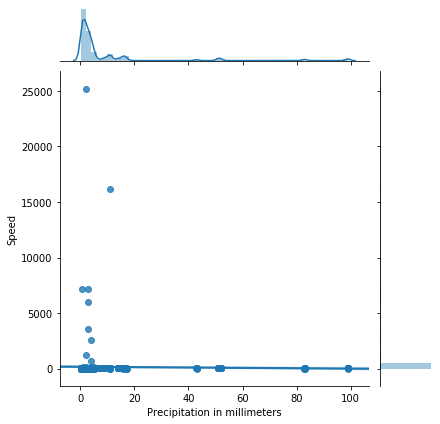

In [143]:
sns.jointplot(x='Precipitation in millimeters', y='Speed', data=df, kind="reg")

In [144]:
df['Speed'].max()

61200.0